In [181]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [182]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [183]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [184]:
# Target Search Term
target_users = ("@BBCWorld", "@CBS", "@CNN", "@FoxNews", "@nytimes")

# Variable to hold all the sentiment results and created at results, a LIST OF DICTIONARIES to later create as a PANDA Dataframe
sentiments = []

#Counter
counter = 1
#set variable for tweet user
tweet_user = ""

# Loop through all target users
for target in target_users:
    
    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Loop through 5 pages to get 100 tweets
    for x in range(5):

        # Get all the tweets from the home feed
        public_tweets = api.user_timeline(target, max_id=oldest_tweet)
        
        
        
        #Loop through all the tweets
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            tweets_ago = counter
            if tweet_user == tweet["user"]["name"]:
                counter += 1
            else:
                counter = 1
                
            tweet_user = tweet["user"]["name"]
            
            
            oldest_tweet = tweet['id']
            
            #Append the dictionaries to the sentiments list
            
            sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                          "User": tweet["user"]["name"]})
            
           

In [200]:
# Read in to the Sentiments Lists and create a data frame
sentiments_pd = pd.DataFrame.from_dict(sentiments)



In [177]:
#Create dataframes per USER
bbc_df = sentiments_pd[sentiments_pd["User"] == "BBC News (World)"]
cbs_df = sentiments_pd[sentiments_pd["User"] == "CBS"]
cnn_df = sentiments_pd[sentiments_pd["User"] == "CNN"]
fox_df = sentiments_pd[sentiments_pd["User"] == "Fox News"]
nyt_df =  sentiments_pd[sentiments_pd["User"] == "The New York Times"]
bbc_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
0,0.6249,Mon Apr 09 01:44:23 +0000 2018,0.819,0.000,0.181,1,BBC News (World)
1,-0.3612,Mon Apr 09 01:44:08 +0000 2018,0.667,0.333,0.000,2,BBC News (World)
2,0.0000,Mon Apr 09 01:35:39 +0000 2018,1.000,0.000,0.000,3,BBC News (World)
3,-0.3182,Mon Apr 09 00:13:22 +0000 2018,0.827,0.173,0.000,4,BBC News (World)
4,0.0000,Mon Apr 09 00:10:28 +0000 2018,1.000,0.000,0.000,5,BBC News (World)


In [198]:
#Obtain the x and y coordinates
bbc_tweets_ago = bbc_df.groupby(["Date"]).mean()["Tweets Ago"]
bbc_polarity_score = bbc_df.groupby(["Date"]).mean()["Compound"]
bbc_date = bbc_df.groupby(["Tweets Ago"]).count()["User"]


cbs_tweets_ago = cbs_df.groupby(["Date"]).mean()["Tweets Ago"]
cbs_polarity_score = cbs_df.groupby(["Date"]).mean()["Compound"]
cbs_date = cbs_df.groupby(["Tweets Ago"]).count()["User"]

cnn_tweets_ago = cnn_df.groupby(["Date"]).mean()["Tweets Ago"]
cnn_polarity_score = cnn_df.groupby(["Date"]).mean()["Compound"]
cnn_date = cnn_df.groupby(["Tweets Ago"]).count()["User"]

fox_tweets_ago = fox_df.groupby(["Date"]).mean()["Tweets Ago"]
fox_polarity_score = fox_df.groupby(["Date"]).mean()["Compound"]
fox_date = fox_df.groupby(["Tweets Ago"]).count()["User"]

nyt_tweets_ago = nyt_df.groupby(["Date"]).mean()["Tweets Ago"]
nyt_polarity_score = nyt_df.groupby(["Date"]).mean()["Compound"]
nyt_date = nyt_df.groupby(["Tweets Ago"]).count()["User"]


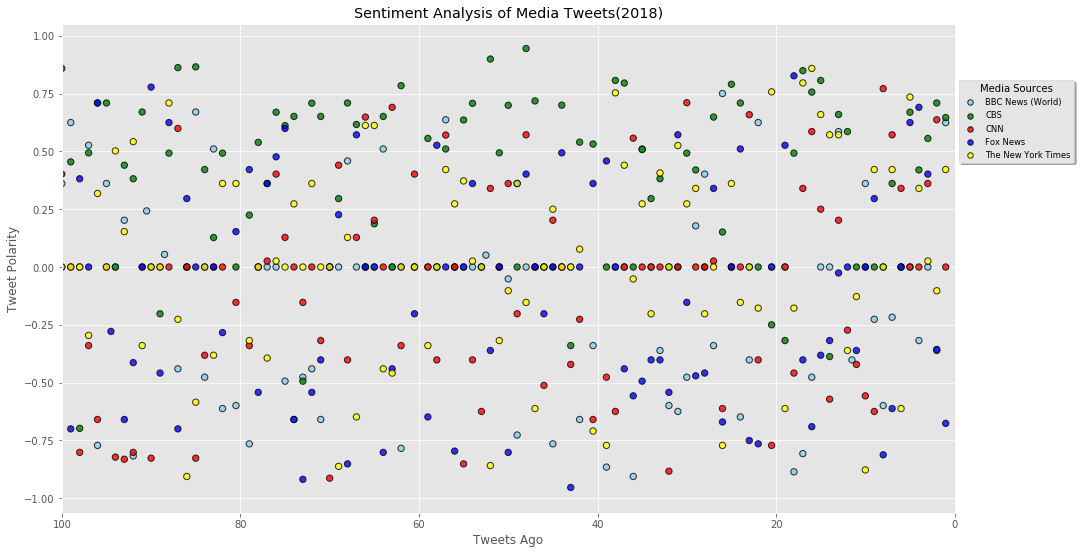

In [191]:
plt.scatter(bbc_tweets_ago, 
            bbc_polarity_score, 
            s=40*bbc_date, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="BBC News (World)")

plt.scatter(cbs_tweets_ago, 
            cbs_polarity_score, 
            s=40*cbs_date, c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CBS")

plt.scatter(cnn_tweets_ago, 
            cnn_polarity_score, 
            s=40*cnn_date, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CNN")

plt.scatter(fox_tweets_ago, 
            fox_polarity_score, 
            s=40*fox_date, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Fox News")

plt.scatter(nyt_tweets_ago, 
            nyt_polarity_score, 
            s=40*nyt_date, c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="The New York Times")


# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets(2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim((100,0))
plt.grid(True)



lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="center left", title="Media Sources", 
                  labelspacing=0.5, fancybox=True, bbox_to_anchor=(1, 0.8 ), shadow = True)


lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]

plt.rcParams["figure.figsize"] = [16,9]

plt.show()

In [202]:
#Create a new dataFrame to make the Bar Graphs
user_group = sentiments_pd.groupby("User")
average_polarity_scores = pd.DataFrame(user_group.mean())
del average_polarity_scores['Tweets Ago']
del average_polarity_scores['Positive']
del average_polarity_scores['Negative']
del average_polarity_scores['Neutral']
average_polarity_scores


,Compound
User,
BBC News (World),-0.127364
CBS,0.346918
CNN,-0.100363
Fox News,-0.105239
The New York Times,0.029522


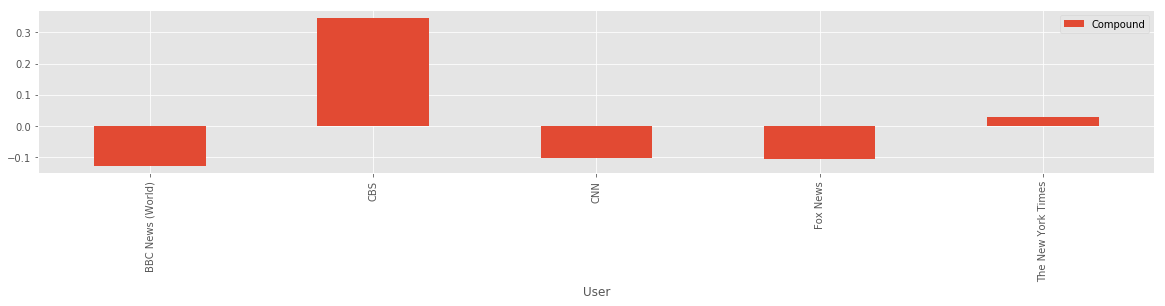

In [203]:
average_polarity_scores.plot(kind="bar", figsize=(20,3))